In [1]:
import warnings; warnings.filterwarnings("ignore")

In [2]:
from IPython import display as disp
import librosa
import soundfile as sf
import os

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  

## vis utils

In [5]:
def plot_waveform(wav: np.ndarray, sr: int, label: str = None, figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    if label:
        fig.suptitle(label, fontsize=16)
    return librosa.display.waveshow(wav, sr=sr, ax=ax)

def plot_mel(wav: np.ndarray, sr: int, label: str = None, figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    if label:
        fig.suptitle(label, fontsize=16)
    S = librosa.feature.melspectrogram(y=wav, sr=sr)
    return librosa.display.specshow(librosa.power_to_db(S, ref=np.max), ax=ax)

## EDA

In [6]:
DATA_PATH = '/Users/timur/Downloads/audio_dataset'

In [7]:
df = pd.read_csv(f'{DATA_PATH}/df.csv') 

In [8]:
df.head(3)

text  \
0  По его словам, на вчерашний вечер у Донбанка «...   
1  Этот процесс так захватывает человека, что он ...   
2  Это крупнейшее левое движение Западного полуша...   

                               audio_id                         worker_id  \
0  2e5fc762-6b7c-4168-8dfd-44e90e908de3  bd83ddb2596e455951c3838ed9061b84   
1  93b47a6a-504c-41e8-b420-1ed5b8360d0d  bd83ddb2596e455951c3838ed9061b84   
2  19588ca3-9249-43cd-bc55-374432dffdbd  bd83ddb2596e455951c3838ed9061b84   

     status  version   pool_id                               task_id  \
0  APPROVED        1  12233816  0000baac58--5e813e8b44e47001255de14a   
1  APPROVED        1  12233816  0000baac58--5e813e8b44e47001255de14a   
2  APPROVED        1  12233816  0000baac58--5e813e8b44e47001255de14a   

                                                path  duration    frames  \
0  audio_files/2e5fc762-6b7c-4168-8dfd-44e90e908d...     13.02  208320.0   
1  audio_files/93b47a6a-504c-41e8-b420-1ed5b8360d...     15.02  240320.0   
2  audio_files/19588ca3-9249-43cd-bc55-374432dffd...     15.48  247680.0   

      rate  
0  16000.0  
1  16000.0  
2  16000.0

In [61]:
df.text.sample(10)

92984    Привет Лисбет Бесс-я не знаю, но пока я люблю ...
41219    Ведомство сообщает, что к злостным неплательщи...
75236    В завтрак вбухали огромное количество продукто...
85227    Президенты Армении и Турции обменялись на эту ...
85211    Одноклассницы решили заставить Машу ограбить п...
42767    То есть будет тотальный контроль за перемещени...
95196    Именно он, а моя настоящая «школа лошадь» дамс...
63070    Затем обналиченные деньги были переданы обвиня...
96486    Бургундия, Кот-д'Ор, Дижон, Tillypronie, Тиль ...
45985    Сегодня мы идем тем же путем, и опять же это в...
Name: text, dtype: object

In [11]:
df.duration.describe()

count    118000.000000
mean          6.871746
std           1.927652
min           0.069250
25%           5.500000
50%           6.600000
75%           7.964062
max          22.060000
Name: duration, dtype: float64

In [13]:
df.groupby('worker_id').size().describe()

count      66.000000
mean     1787.878788
std       853.213861
min       320.000000
25%      1000.000000
50%      2000.000000
75%      2030.000000
max      4000.000000
dtype: float64

In [14]:
df.status.value_counts(1)

APPROVED    0.707119
REJECTED    0.292881
Name: status, dtype: float64

In [17]:
sample = df.sample()

In [22]:
df = df[df.status == 'APPROVED'].sample(1000)

In [23]:
path = f"{DATA_PATH}/{sample['path'].item()}"

In [24]:
disp.display(disp.Audio(path))
print(sample['text'].item())

Именно он повторно заряжает энергией альбом, который только иногда, как правило, засыпают.


In [25]:
wav, sr = librosa.load(path)

In [26]:
wav.shape

(206388,)

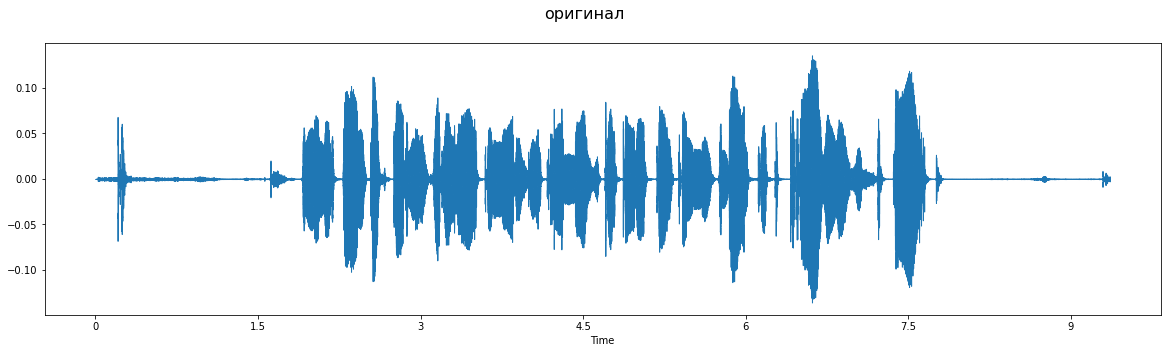

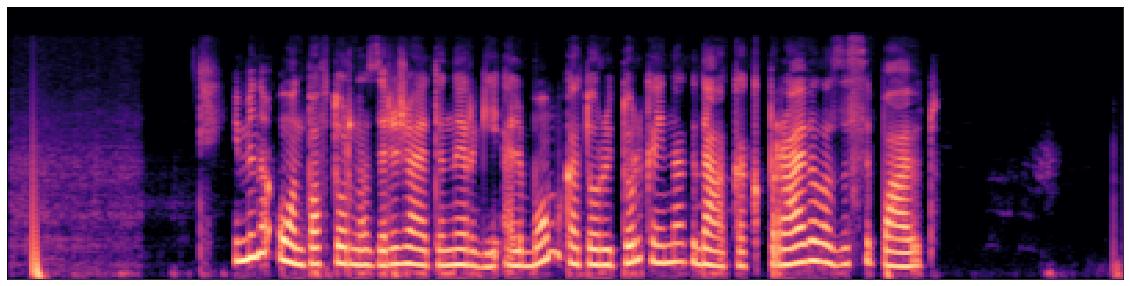

In [29]:
plot_waveform(wav, sr, 'оригинал')
plot_mel(wav, sr)

## white noise

In [30]:
def add_white_noise(signal, noise_percentage_factor=0.2):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [31]:
noised_wav = add_white_noise(wav)
noised_audio_path = 'noised.wav'
sf.write(noised_audio_path, noised_wav, sr)
disp.display(disp.Audio(noised_audio_path))

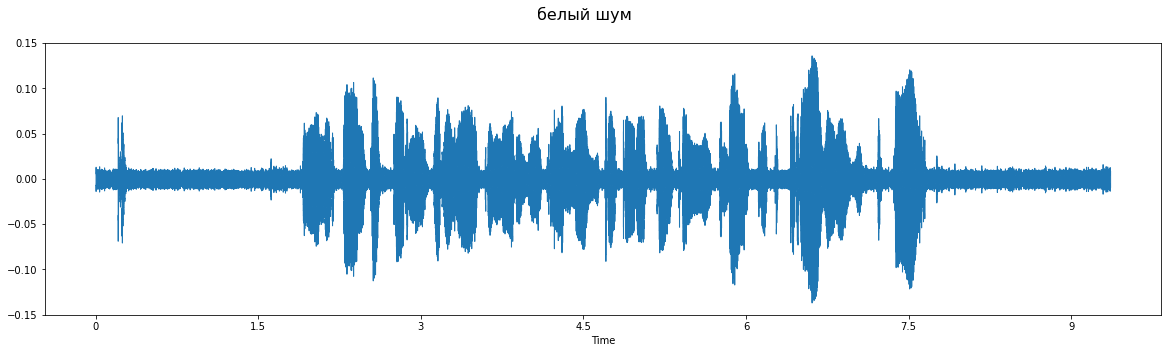

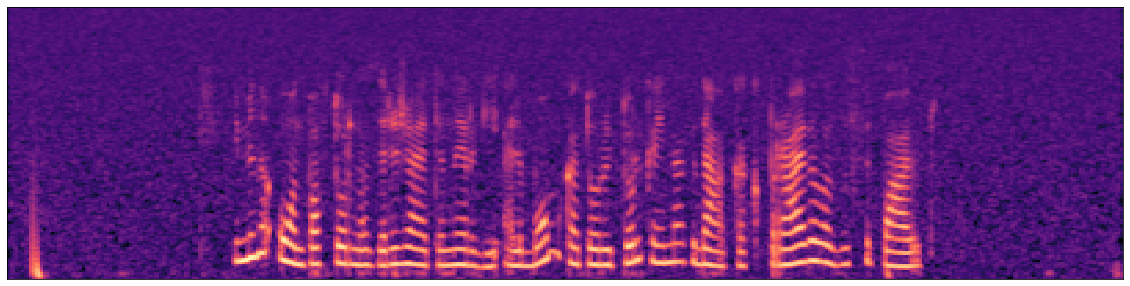

In [32]:
plot_waveform(noised_wav, sr, 'белый шум')
plot_mel(noised_wav, sr)

## prerecorded noise

In [33]:
sounds_path='../sounds/'

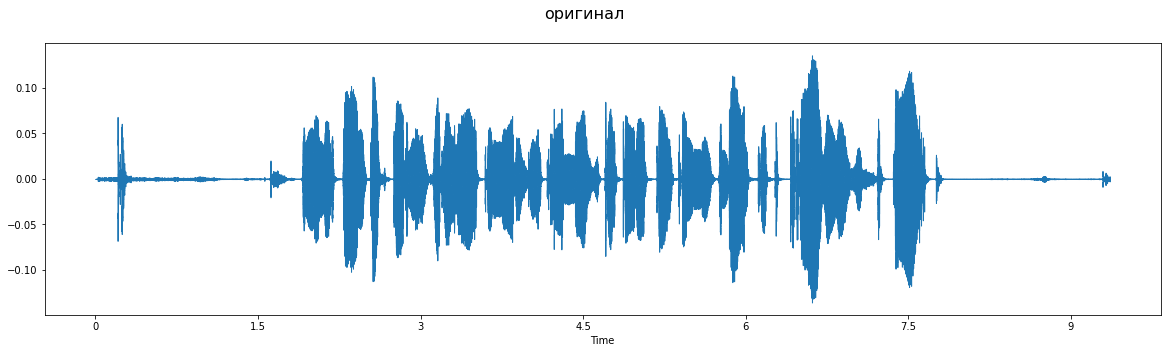

scratch.wav


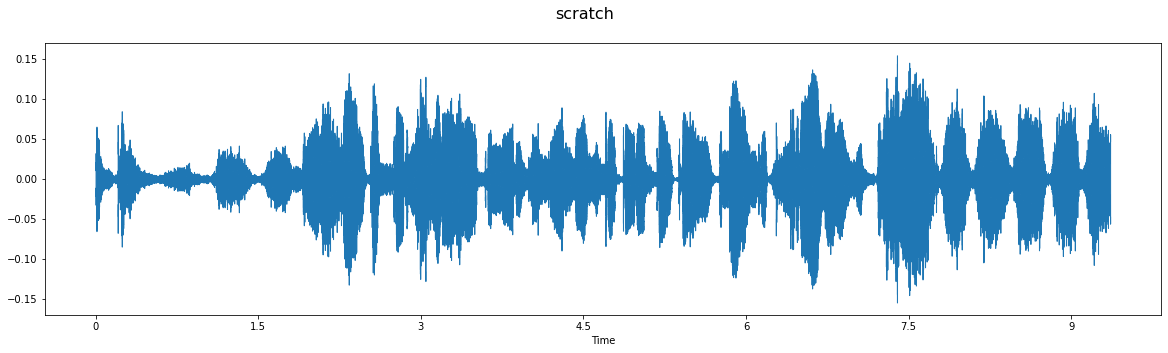

laugh.wav


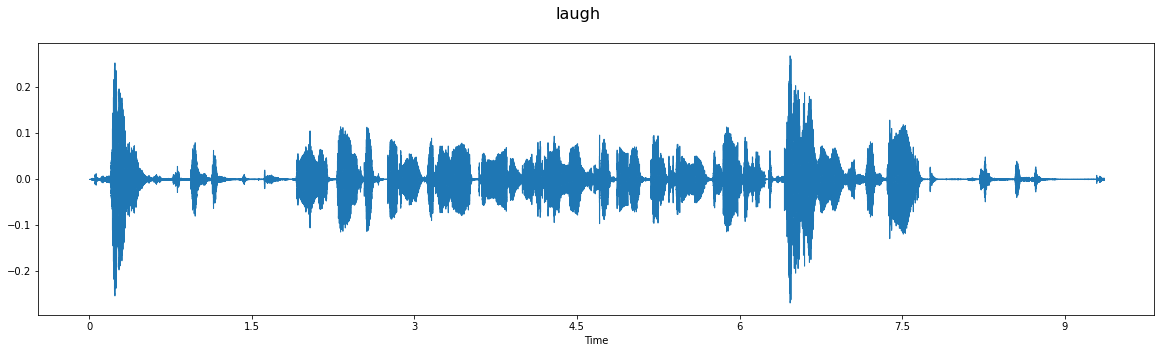

sneeze.wav


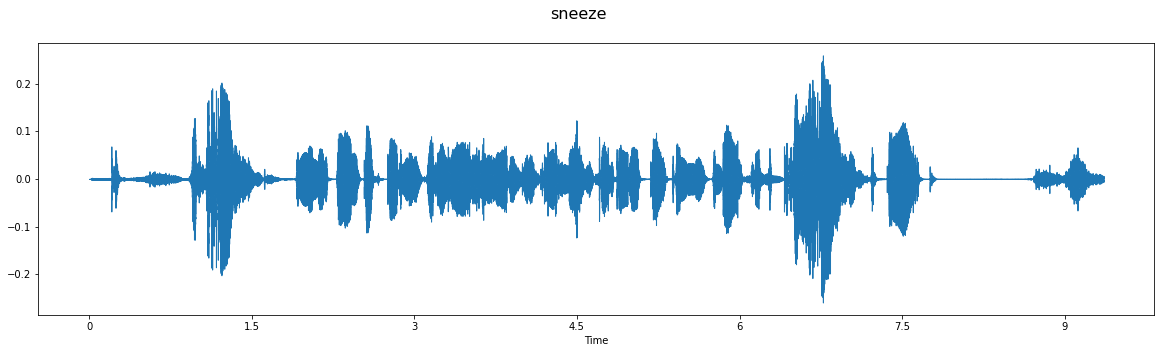

scratch_2.wav


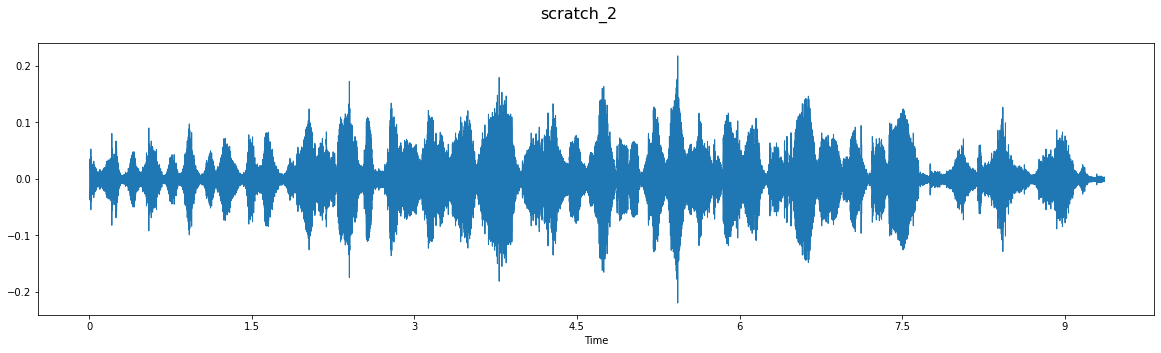

clothes.wav


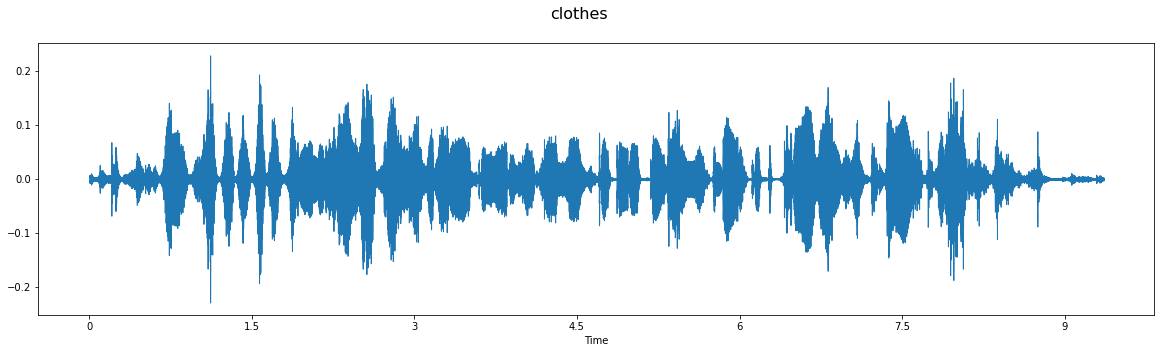

chuavning.wav


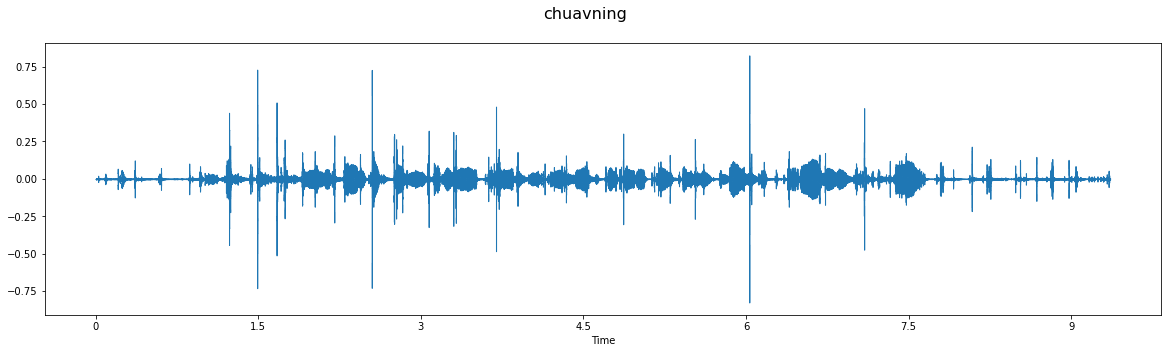

beat.wav


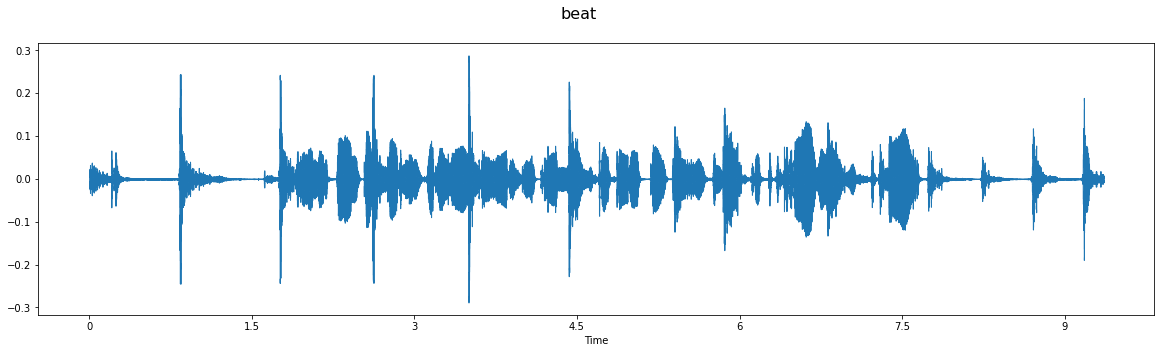

cough.wav


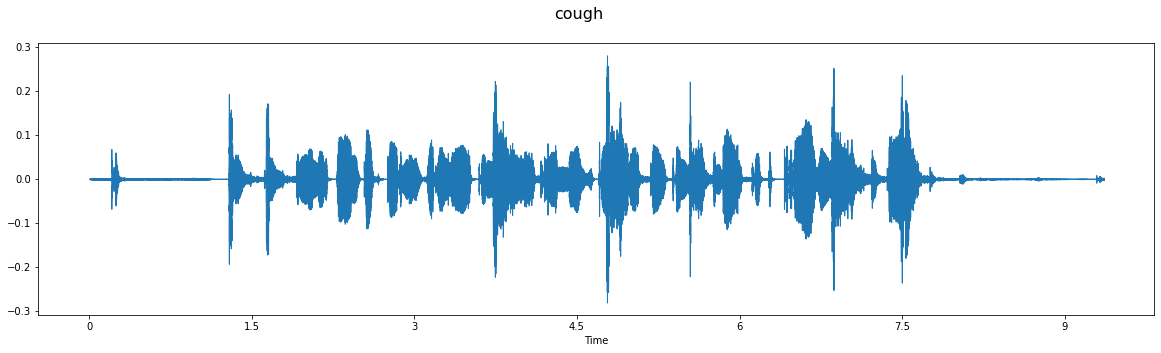

claps.wav


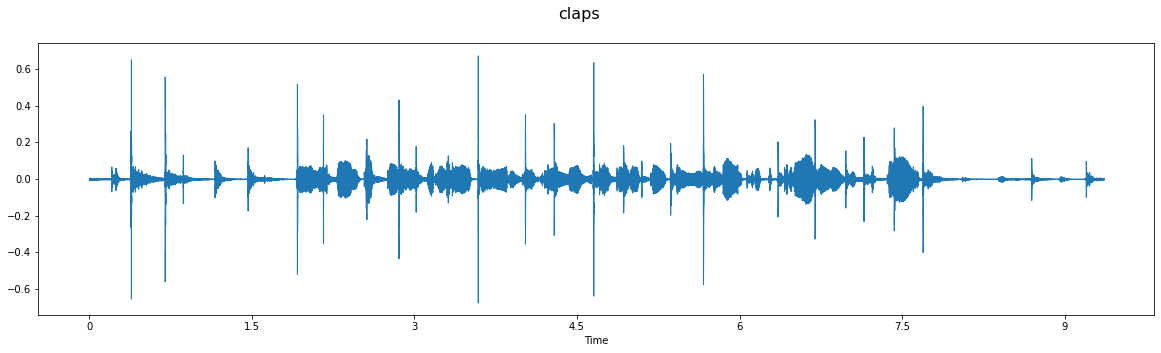

In [56]:
sound_names = os.listdir(sounds_path)
plot_waveform(wav, sr, label='оригинал')
disp.display(disp.Audio(path))
plt.show()
for sound_name in sound_names:
    aug_func = AddBackgroundNoise(
        sounds_path=f"{sounds_path}/{sound_name}",
        min_snr_in_db=1/2.0,
        max_snr_in_db=2.0,
        noise_transform=PolarityInversion(),
        p=1.0
    )
    auged_wav = aug_func(wav, sr)
    auged_audio_path = f'auged_{sound_name}'
    sf.write(auged_audio_path, auged_wav, sr)
    print(sound_name)
    disp.display(disp.Audio(auged_audio_path))
    plot_waveform(auged_wav, sr, sound_name.split('.')[0])
    plt.show()

In [ ]:
%%timeit
wav, sr = librosa.load(path)
auged_wav = add_backgroud_noise(wav, sr)
sf.write('a.wav', auged_wav, sr)

In [57]:
aug_pipeline = Compose([
    AddGaussianNoise(
        min_amplitude=0.005,
        max_amplitude=0.015,
        p=0.5
    ),
    AddBackgroundNoise(
        sounds_path=f"{sounds_path}",
        min_snr_in_db=1/2.0,
пше max_snr_in_db=2.0,
        noise_transform=PolarityInversion(),
        p=1.0,
    )
])

In [58]:
SAVE_DIR = '../dataset'
clean_prefix = 'clean'
noisy_prefix = 'noisy'

In [59]:
from tqdm import tqdm
format_i = f"0{int(np.ceil(np.log10(len(df)))) + 1}d"

for i, fname in tqdm(enumerate(df.path.values), total=len(df)):
    path = f'{DATA_PATH}/{fname}'
    
    wav, sr = librosa.load(path)
    
    new_path_clean = f'{SAVE_DIR}/{clean_prefix}/{format(i, format_i)}.wav'
    new_path_noisy = f'{SAVE_DIR}/{noisy_prefix}/{format(i, format_i)}.wav'
    
    auged_wav = aug_pipeline(wav, sr)
    sf.write(new_path_clean, wav, sr)
    sf.write(new_path_noisy, auged_wav, sr)

100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [05:23<00:00,  3.09it/s]
